# Applying Glassbox Model to Explaining Life Expectancy in Chicago Census Tracts

## Import Libraries and files

In [1]:
#import libaries
from interpret import set_visualize_provider
from interpret.provider import InlineProvider
set_visualize_provider(InlineProvider())
#set pandas column to max
import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

from interpret.glassbox import ExplainableBoostingClassifier
from interpret.glassbox import LogisticRegression
from interpret import show

In [3]:
#import final_model into pandas
model = pd.read_csv('final_model.csv')

In [74]:
model.head()

Tract        neighborhood  Labor Force  Unemployed  Employed  \
0  271400.0  EAST GARFIELD PARK        456.0         8.5      39.9   
1  280100.0      NEAR WEST SIDE       5892.0         2.7      88.6   
2  310300.0     LOWER WEST SIDE       1126.0        11.1      66.0   
3  200200.0             HERMOSA       2440.0         7.4      57.7   
4  221400.0        LOGAN SQUARE       2048.0         2.9      76.9   

   Family Poverty  No HS  Some HS  HS Graduates  Bachelors Degree  \
0            43.3    3.0     22.9          26.0              11.0   
1             0.0    0.0      0.0           3.8              49.4   
2            14.2   14.4      7.9          15.6              26.3   
3            26.9   22.8     14.5          34.6               6.8   
4            12.7    4.5      8.8          22.6              29.6   

   Grad/Prof Degree  Private Health Ins  Public Health Ins  No Health Ins  \
0               3.0                30.1               58.8           13.8   
1              39.9                94.5                4.7            3.6   
2              11.7                49.5               23.8           31.4   
3               2.6                32.8               49.0           21.9   
4              14.7                63.7               14.8           24.2   

   No Vehicles  One Vehicle  Two Vehicles  Three+ Vehicles  Drive Alone  \
0         30.2         54.2          15.1              0.5         31.0   
1         31.0         58.1           9.5              1.3         25.4   
2         21.7         37.6          30.5             10.2         51.7   
3         24.7         32.6          30.3             12.3         66.0   
4         22.0         60.7          15.3              2.0         38.8   

   Carpooled  Walked  Other means   WFH  Public Transit  Total Population  \
0        8.3     0.5          7.8  11.2            41.2            1185.0   
1        3.5    43.6          6.1   7.3            14.1            6811.0   
2        5.7     5.5         10.8   3.6            22.6            1673.0   
3        8.9     4.1          1.6   2.0            17.4            4815.0   
4        5.7     0.3          4.4   9.6            41.2            3034.0   

   Male  Female  Census Tract Number  Life Expectancy  \
0  51.9    48.1               2714.0        68.600000   
1  49.3    50.7               2801.0        74.068631   
2  59.0    41.0               3103.0        79.100000   
3  50.8    49.2               2002.0        78.500000   
4  58.3    41.7               2214.0        80.900000   

   Life Expectancy Standard Error  NAME10  Life Expectancy_abvavg  \
0                        3.622800  2714.0                       0   
1                        2.721147  2801.0                       0   
2                        3.222500  3103.0                       1   
3                        1.940100  2002.0                       1   
4                        3.074800  2214.0                       1   

   Life_Expectancy_Difference  Unemployed_cat_10-15%  Unemployed_cat_15-20%  \
0                   -8.163070                      0                      0   
1                   -2.694439                      0                      0   
2                    2.336930                      1                      0   
3                    1.736930                      0                      0   
4                    4.136930                      0                      0   

   Unemployed_cat_20-25%  Unemployed_cat_25 or more  Unemployed_cat_5-10%  \
0                      0                          0                     1   
1                      0                          0                     0   
2                      0                          0                     0   
3                      0                          0                     1   
4                      0                          0                     0   

   Unemployed_cat_less than 5%  sex_cat_More Men  sex_cat_More Women  \
0                        

In [4]:
#from Engineering/Chicago_Tracts.csv join Tract with model to merge and get area
#merge the two dataframes
chicago_tracts = pd.read_csv('Engineering/Chicago_Tracts.csv')
chicago_tracts.head()

#merge the two dataframes
model = model.merge(chicago_tracts, on='neighborhood', how='left')
model.head()

Tract        neighborhood  Labor Force  Unemployed  Employed  \
0  271400.0  EAST GARFIELD PARK        456.0         8.5      39.9   
1  271400.0  EAST GARFIELD PARK        456.0         8.5      39.9   
2  271400.0  EAST GARFIELD PARK        456.0         8.5      39.9   
3  271400.0  EAST GARFIELD PARK        456.0         8.5      39.9   
4  271400.0  EAST GARFIELD PARK        456.0         8.5      39.9   

   Family Poverty  No HS  Some HS  HS Graduates  Bachelors Degree  \
0            43.3    3.0     22.9          26.0              11.0   
1            43.3    3.0     22.9          26.0              11.0   
2            43.3    3.0     22.9          26.0              11.0   
3            43.3    3.0     22.9          26.0              11.0   
4            43.3    3.0     22.9          26.0              11.0   

   Grad/Prof Degree  Private Health Ins  Public Health Ins  No Health Ins  \
0               3.0                30.1               58.8           13.8   
1               3.0                30.1               58.8           13.8   
2               3.0                30.1               58.8           13.8   
3               3.0                30.1               58.8           13.8   
4               3.0                30.1               58.8           13.8   

   No Vehicles  One Vehicle  Two Vehicles  Three+ Vehicles  Drive Alone  \
0         30.2         54.2          15.1              0.5         31.0   
1         30.2         54.2          15.1              0.5         31.0   
2         30.2         54.2          15.1              0.5         31.0   
3         30.2         54.2          15.1              0.5         31.0   
4         30.2         54.2          15.1              0.5         31.0   

   Carpooled  Walked  Other means   WFH  Public Transit  Total Population  \
0        8.3     0.5          7.8  11.2            41.2            1185.0   
1        8.3     0.5          7.8  11.2            41.2            1185.0   
2        8.3     0.5          7.8  11.2            41.2            1185.0   
3        8.3     0.5          7.8  11.2            41.2            1185.0   
4        8.3     0.5          7.8  11.2            41.2            1185.0   

   Male  Female  Census Tract Number  Life Expectancy  \
0  51.9    48.1               2714.0             68.6   
1  51.9    48.1               2714.0             68.6   
2  51.9    48.1               2714.0             68.6   
3  51.9    48.1               2714.0             68.6   
4  51.9    48.1               2714.0             68.6   

   Life Expectancy Standard Error  NAME10_x  Life Expectancy_abvavg  \
0                          3.6228    2714.0                       0   
1                          3.6228    2714.0                       0   
2                          3.6228    2714.0                       0   
3                          3.6228    2714.0                       0   
4                          3.6228    2714.0                       0   

   Life_Expectancy_Difference  Unemployed_cat_10-15%  Unemployed_cat_15-20%  \
0                    -8.16307                      0                      0   
1                    -8.16307                      0                      0   
2                    -8.16307                      0                      0   
3                    -8.16307                      0                      0   
4                    -8.16307                      0                      0   

   Unemployed_cat_20-25%  Unemployed_cat_25 or more  Unemployed_cat_5-10%  \
0                      0                          0                     1   
1                      0                          0                     1   
2                      0                          0                     1   
3                      0                          0                     1   
4                      0                          0                     1   

   Unemployed_cat_less than 5%  sex_cat_More Men  sex_cat_More Women  \
0            

# Explainable Boosting Machine and Traditional Models

## EBM: Boosting Classifier

In [5]:
df = model

y=df['Life Expectancy_abvavg']
X=df[['area','neighborhood','Unemployed_cat_10-15%','Unemployed_cat_15-20%', 'Unemployed_cat_20-25%','Unemployed_cat_25 or more', 'Unemployed_cat_5-10%','Unemployed_cat_less than 5%', 'sex_cat_More Men', 'sex_cat_More Women','vehicle_cat_No Vehicles', 'vehicle_cat_One Vehicle','vehicle_cat_Three+ Vehicles', 'vehicle_cat_Two Vehicles','transport_cat_Carpooled', 'transport_cat_Drive Alone','transport_cat_Public Transit', 'transport_cat_Walked','education_cat_Bachelors Degree', 'education_cat_Grad/Prof Degree','education_cat_HS Graduates', 'education_cat_No HS','education_cat_Some HS', 'health_ins_cat_No Health Ins','health_ins_cat_Private Health Ins', 'health_ins_cat_Public Health Ins','area_Central', 'area_Far North Side', 'area_Far South Side','area_Far Southwest Side', 'area_North Side', 'area_Northwest Side','area_South Side', 'area_Southwest Side', 'area_West Side']]

seed = 42
np.random.seed(seed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=seed)

ebm = ExplainableBoostingClassifier()
#ebm = LogisticRegression()
ebm.fit(X_train, y_train)

auc = roc_auc_score(y_test, ebm.predict_proba(X_test)[:, 1])
print("AUC: {:.3f}".format(auc))
show(ebm.explain_global())

AUC: 0.957


## Explain logit regression (above average life expectancy)

In [8]:
df = model

y=df['Life Expectancy_abvavg']
X=df[['Unemployed_cat_10-15%','Unemployed_cat_15-20%', 'Unemployed_cat_20-25%','Unemployed_cat_25 or more', 'Unemployed_cat_5-10%','Unemployed_cat_less than 5%', 'sex_cat_More Men', 'sex_cat_More Women','vehicle_cat_No Vehicles', 'vehicle_cat_One Vehicle','vehicle_cat_Three+ Vehicles', 'vehicle_cat_Two Vehicles','transport_cat_Carpooled', 'transport_cat_Drive Alone','transport_cat_Public Transit', 'transport_cat_Walked','education_cat_Bachelors Degree', 'education_cat_Grad/Prof Degree','education_cat_HS Graduates', 'education_cat_No HS','education_cat_Some HS', 'health_ins_cat_No Health Ins','health_ins_cat_Private Health Ins', 'health_ins_cat_Public Health Ins','area_Central', 'area_Far North Side', 'area_Far South Side','area_Far Southwest Side', 'area_North Side', 'area_Northwest Side','area_South Side', 'area_Southwest Side', 'area_West Side']]

seed = 42
np.random.seed(seed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=seed)

#ebm = ExplainableBoostingClassifier()
ebm = LogisticRegression()
ebm.fit(X_train, y_train)

auc = roc_auc_score(y_test, ebm.predict_proba(X_test)[:, 1])
print("AUC: {:.3f}".format(auc))
show(ebm.explain_global())

c:\Users\goodm\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



AUC: 0.917


### Explainable for Life Expectancy

In [12]:
model['Life Expectancy_belavg'] = np.where(model['Life Expectancy_abvavg'] == 1, 0, 1)

In [14]:
df = model

y=df['Life Expectancy_belavg']
#X=df[['area','neighborhood','Unemployed_cat_10-15%','Unemployed_cat_15-20%', 'Unemployed_cat_20-25%','Unemployed_cat_25 or more', 'Unemployed_cat_5-10%','Unemployed_cat_less than 5%', 'sex_cat_More Men', 'sex_cat_More Women','vehicle_cat_No Vehicles', 'vehicle_cat_One Vehicle','vehicle_cat_Three+ Vehicles', 'vehicle_cat_Two Vehicles','transport_cat_Carpooled', 'transport_cat_Drive Alone','transport_cat_Public Transit', 'transport_cat_Walked','education_cat_Bachelors Degree', 'education_cat_Grad/Prof Degree','education_cat_HS Graduates', 'education_cat_No HS','education_cat_Some HS', 'health_ins_cat_No Health Ins','health_ins_cat_Private Health Ins', 'health_ins_cat_Public Health Ins','area_Central', 'area_Far North Side', 'area_Far South Side','area_Far Southwest Side', 'area_North Side', 'area_Northwest Side','area_South Side', 'area_Southwest Side', 'area_West Side']]
X=df[['Unemployed_cat_10-15%','Unemployed_cat_15-20%', 'Unemployed_cat_20-25%','Unemployed_cat_25 or more', 'Unemployed_cat_5-10%','Unemployed_cat_less than 5%', 'sex_cat_More Men', 'sex_cat_More Women','vehicle_cat_No Vehicles', 'vehicle_cat_One Vehicle','vehicle_cat_Three+ Vehicles', 'vehicle_cat_Two Vehicles','transport_cat_Carpooled', 'transport_cat_Drive Alone','transport_cat_Public Transit', 'transport_cat_Walked','education_cat_Bachelors Degree', 'education_cat_Grad/Prof Degree','education_cat_HS Graduates', 'education_cat_No HS','education_cat_Some HS', 'health_ins_cat_No Health Ins','health_ins_cat_Private Health Ins', 'health_ins_cat_Public Health Ins','area_Central', 'area_Far North Side', 'area_Far South Side','area_Far Southwest Side', 'area_North Side', 'area_Northwest Side','area_South Side', 'area_Southwest Side', 'area_West Side']]

seed = 42
np.random.seed(seed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=seed)

#ebm = ExplainableBoostingClassifier()
ebm = LogisticRegression()
ebm.fit(X_train, y_train)

auc = roc_auc_score(y_test, ebm.predict_proba(X_test)[:, 1])
print("AUC: {:.3f}".format(auc))
show(ebm.explain_global())

c:\Users\goodm\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



AUC: 0.917


In [57]:
#Create a function that takes the logistic coefficient and returns the adjusted probability
def adj_prob(coef,data=df):
    init_prob=data['Life Expectancy_belavg'].sum()/data['Life Expectancy_belavg'].count()
    baseline=(init_prob/(1-init_prob))
    adj_odds=baseline*np.exp(coef)
    adj_prob=adj_odds/(1+adj_odds)
    return adj_prob

### SK Learn Logistic Regression and Accuracy Score

AUC: 0.917


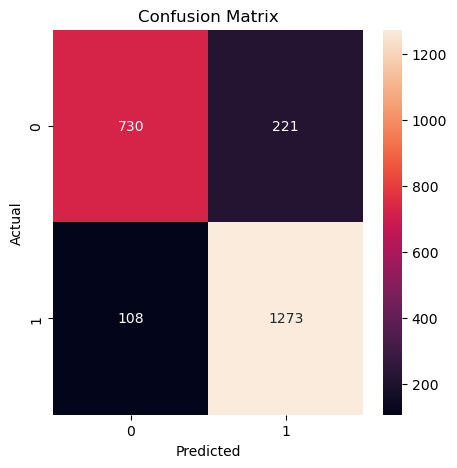

              precision    recall  f1-score   support

           0       0.87      0.77      0.82       951
           1       0.85      0.92      0.89      1381

    accuracy                           0.86      2332
   macro avg       0.86      0.84      0.85      2332
weighted avg       0.86      0.86      0.86      2332



Coefficient  Adjusted Probability  \
area_Far South Side                  -1.679586              0.111326   
area_Far Southwest Side              -1.626125              0.116726   
vehicle_cat_Three+ Vehicles          -1.304747              0.154149   
area_South Side                      -1.266939              0.159143   
area_West Side                       -1.085144              0.185001   
Unemployed_cat_25 or more            -1.070584              0.187207   
Unemployed_cat_15-20%                -1.032543              0.193064   
education_cat_Some HS                -1.030915              0.193318   
transport_cat_Carpooled              -0.739564              0.242827   
Unemployed_cat_20-25%                -0.572380              0.274869   
health_ins_cat_No Health Ins         -0.519220              0.285590   
health_ins_cat_Public Health Ins     -0.462382              0.297327   
education_cat_HS Graduates           -0.454866              0.298899   
vehicle_cat_No Vehicles              -0.315393              0.328920   
transport_cat_Walked                 -0.184901              0.358339   
sex_cat_More Women                   -0.167797              0.362281   
area_Southwest Side                  -0.148466              0.366759   
sex_cat_More Men                      0.157101              0.440144   
Unemployed_cat_10-15%                 0.220664              0.455861   
area_Far North Side                   0.450916              0.513306   
transport_cat_Public Transit          0.451404              0.513428   
education_cat_Bachelors Degree        0.452973              0.513820   
transport_cat_Drive Alone             0.462364              0.516166   
education_cat_Grad/Prof Degree        0.478460              0.520184   
vehicle_cat_One Vehicle               0.537717              0.534952   
education_cat_No HS                   0.543652              0.536428   
area_Northwest Side                   0.631383              0.558161   
health_ins_cat_Private Health Ins     0.970905              0.639507   
vehicle_cat_Two Vehicles              1.071727              0.662409   
Unemployed_cat_less than 5%           1.149809              0.679642   
Unemployed_cat_5-10%                  1.294337              0.710262   
area_North Side                       1.537302              0.757610   
area_Central                          3.175962              0.941491   

                                   prob_lowLifeExpectancy  
area_Far South Side                              0.888674  
area_Far Southwest Side                          0.883274  
vehicle_cat_Three+ Vehicles                      0.845851  
area_South Side                                  0.840857  
area_West Side                                   0.814999  
Unemployed_cat_25 or more                        0.812793  
Unemployed_cat_15-20%                            0.806936  
education_cat_Some HS                            0.806682  
transport_cat_Carpooled                          0.757173  
Unemployed_cat_20-25%                            0.725131  
health_ins_cat_No Health Ins                     0.714410  
health_ins_cat_Public Health Ins                 0.702673  
education_cat_HS Graduates                       0.701101  
vehicle_cat_No Vehicles                          0.671080  
transport_cat_Walked                             0.641661  
sex_cat_More Women                               0.637719  
area_Southwest Side                              0.633241  
sex_cat_More Men                                 0.559856  
Unemployed_cat_10-15%                            0.544139  
area_Far North Side                              0.486694  
transport_cat_Public Transit                     0.486572  
education_cat_Bachelors Degree                   0.486180  
transport_cat_Drive Alone                        0.483834  
education_cat_Grad/Prof Degree                   0.479816  
vehicle_cat_One Vehicle                          0.465048  
education_cat_No HS       

In [58]:
#scikit regression
from sklearn.linear_model import LogisticRegression
df = model

y=df['Life Expectancy_abvavg']
X=df[['Unemployed_cat_10-15%','Unemployed_cat_15-20%', 'Unemployed_cat_20-25%','Unemployed_cat_25 or more', 'Unemployed_cat_5-10%','Unemployed_cat_less than 5%', 'sex_cat_More Men', 'sex_cat_More Women','vehicle_cat_No Vehicles', 'vehicle_cat_One Vehicle','vehicle_cat_Three+ Vehicles', 'vehicle_cat_Two Vehicles','transport_cat_Carpooled', 'transport_cat_Drive Alone','transport_cat_Public Transit', 'transport_cat_Walked','education_cat_Bachelors Degree', 'education_cat_Grad/Prof Degree','education_cat_HS Graduates', 'education_cat_No HS','education_cat_Some HS', 'health_ins_cat_No Health Ins','health_ins_cat_Private Health Ins', 'health_ins_cat_Public Health Ins','area_Central', 'area_Far North Side', 'area_Far South Side','area_Far Southwest Side', 'area_North Side', 'area_Northwest Side','area_South Side', 'area_Southwest Side', 'area_West Side']]

seed = 42
np.random.seed(seed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=seed)

#regression
reg = LogisticRegression(solver='saga', max_iter=1000)
reg.fit(X_train, y_train)

auc = roc_auc_score(y_test, reg.predict_proba(X_test)[:, 1])
print("AUC: {:.3f}".format(auc))

y_pred=reg.predict(X_test)

#plot confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#summary of model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# Retrieve the coefficients of the model
coefficients = reg.coef_

# Retrieve the intercept of the model
intercept = reg.intercept_

# If you have feature names available (e.g., from a DataFrame), you can pair them with the coefficients like this:
feature_names = X_train.columns # This assumes X_train is a DataFrame
feature_coefficients = dict(zip(feature_names, coefficients[0]))

#save to pd
coefficients = pd.DataFrame.from_dict(feature_coefficients, orient='index', columns=['Coefficient'])
coefficients['Adjusted Probability'] = coefficients['Coefficient'].apply(adj_prob)
coefficients['prob_lowLifeExpectancy'] = 1 - coefficients['Adjusted Probability']
#order by adjusted probability
coefficients = coefficients.sort_values(by='prob_lowLifeExpectancy', ascending=False)
coefficients


## Linear Regression: OLS

### Import model and run OLS

In [7]:
model1=model

In [8]:
#summary regression model
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import numpy as np

df=model1

y=df['Life Expectancy']
X=df[['Labor Force', 'Unemployed', 'Employed',
       'Family Poverty', 'No HS', 'Some HS', 'HS Graduates',
       'Bachelors Degree', 'Grad/Prof Degree', 'Private Health Ins',
       'Public Health Ins', 'No Health Ins', 'No Vehicles', 'One Vehicle',
       'Two Vehicles', 'Three+ Vehicles', 'Drive Alone', 'Carpooled', 'Walked',
       'Other means', 'WFH', 'Public Transit', 'Total Population', 'Male',
       'Female','area_Far North Side', 'area_Far South Side',
       'area_Far Southwest Side', 'area_North Side', 'area_Northwest Side',
       'area_South Side', 'area_Southwest Side', 'area_West Side']]

seed = 42
np.random.seed(seed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=seed)

### OLS Summary

In [13]:
#sm regression
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Life Expectancy   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     621.4
Date:                Sat, 24 Feb 2024   Prob (F-statistic):               0.00
Time:                        19:28:41   Log-Likelihood:                -22062.
No. Observations:                9326   AIC:                         4.419e+04
Df Residuals:                    9293   BIC:                         4.443e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

### Residual Distributions

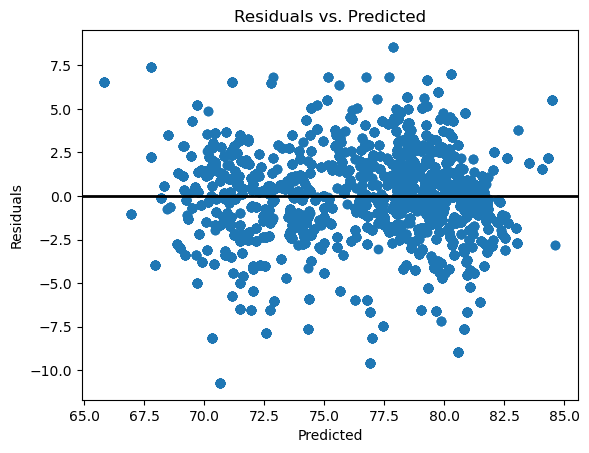

In [14]:
#plot residuals
import matplotlib.pyplot as plt
import seaborn as sns
y_pred = model.predict(X_train)
residuals = y_train - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted')
plt.axhline(0, color='black', lw=2)
plt.show()

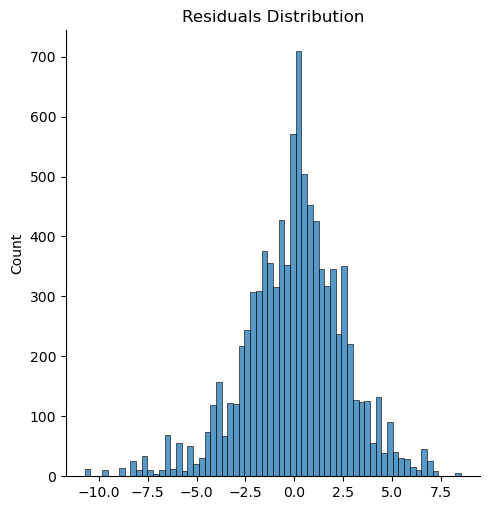

In [15]:
#distribution of residuals
sns.displot(residuals)
plt.title('Residuals Distribution')
plt.show()

## XGBOOST

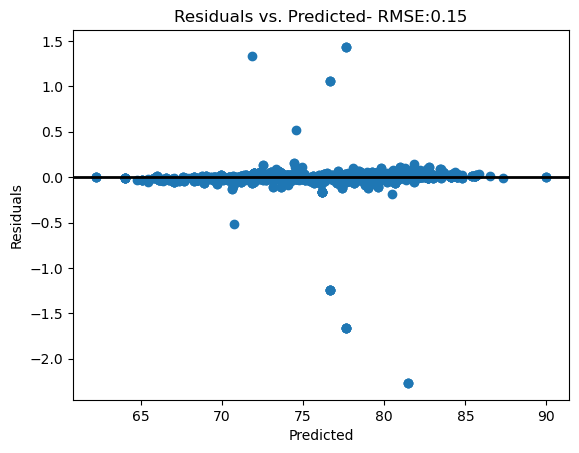

In [9]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# Perform some operations on y and X
# ...
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the XGBoost model
xgb_model = xgb.XGBRegressor()

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = xgb_model.predict(X_test)

# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

#plot residuals
import matplotlib.pyplot as plt
import seaborn as sns
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted'+'- RMSE:'+str(rmse.round(2)))
plt.axhline(0, color='black', lw=2)
plt.show()

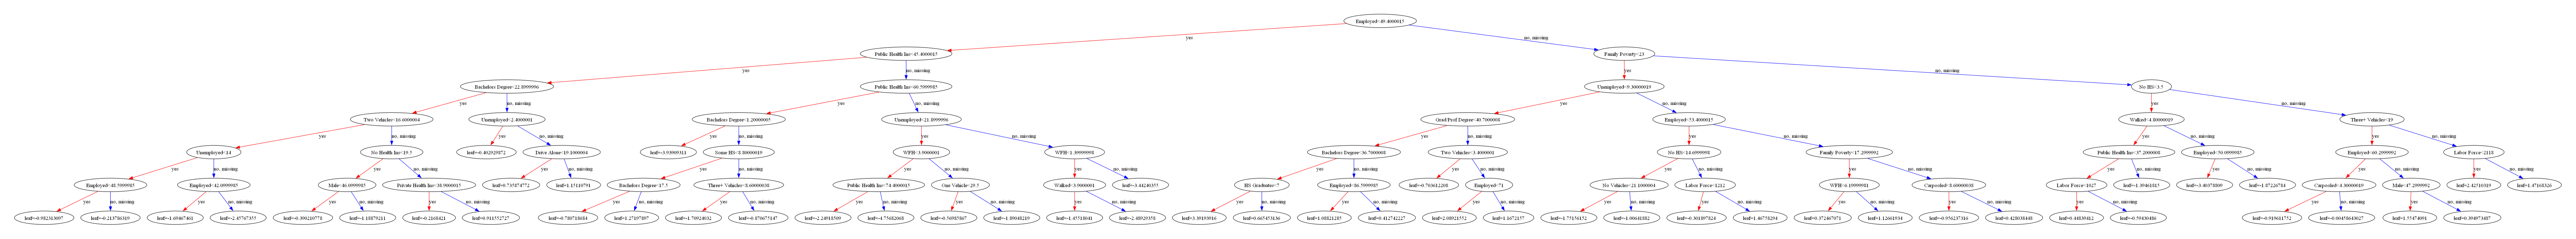

In [19]:
# Create a larger figure and increase DPI
plt.figure(figsize=(20, 15), dpi=500)  # You can adjust the size and DPI as needed

# Plot the first tree with increased size
xgb.plot_tree(xgb_model, num_trees=0, ax=plt.gca())

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


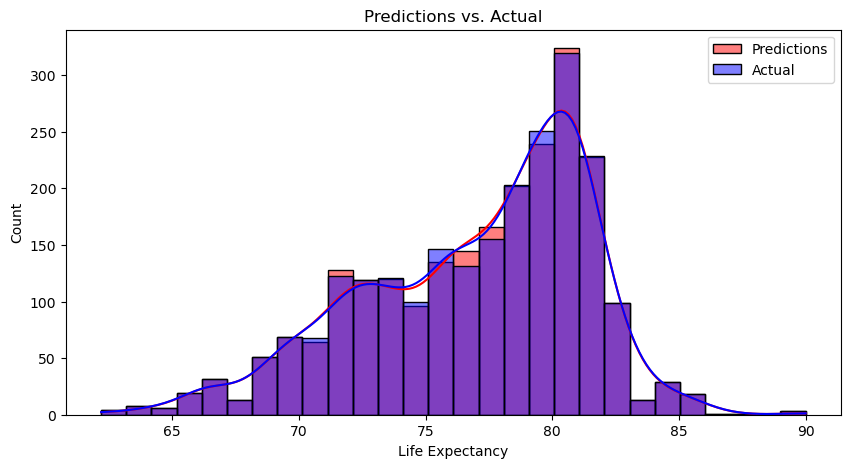

In [29]:
#histogram of y_pred and y_test on top of eachother
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.histplot(y_pred, kde=True, color='red', label='Predictions')
sns.histplot(y_test, kde=True, color='blue', label='Actual')
plt.title('Predictions vs. Actual')
plt.legend()
plt.show()


### Survival Function

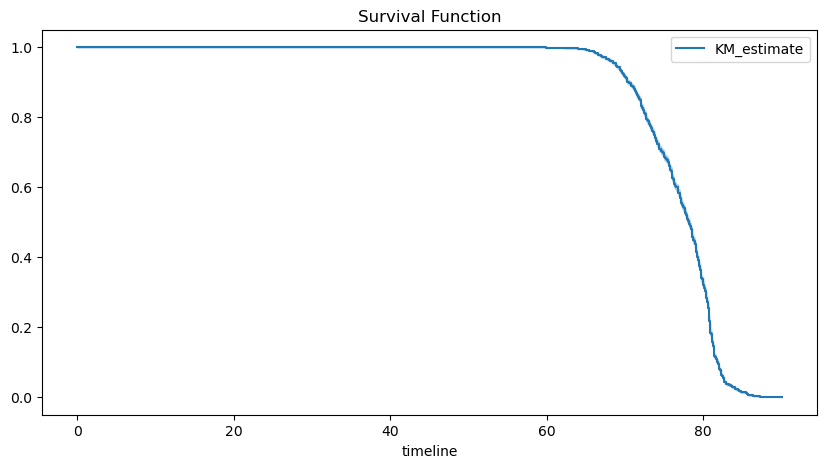

In [35]:
#survival analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter

# Create a KaplanMeierFitter instance
kmf = KaplanMeierFitter()

# Fit the model on the data
kmf.fit(durations=df['Life Expectancy'])

#reset plot size
plt.figure(figsize=(10, 5))

# Create an estimate of the survival function
kmf.plot()
plt.title('Survival Function')
plt.show()


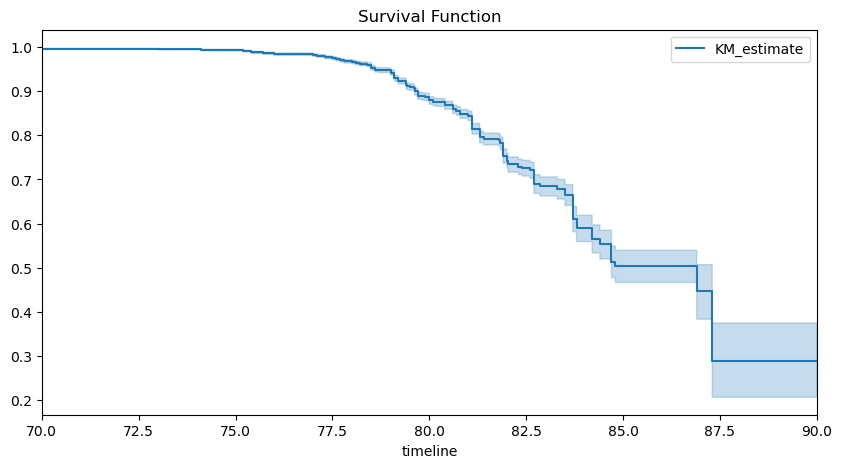

In [70]:
#change plot axis to be between 70 and 90
plt.figure(figsize=(10, 5))
kmf.plot()
plt.xlim(70, 90)
plt.title('Survival Function')
plt.show()